In [799]:
import pandas as pd
from functools import reduce  
import operator
import collections
import networkx as nx
from collections import Mapping

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  


In [747]:
df = pd.read_csv("categories.tsv", delimiter = "\t", names = ["0","1"] )
df = df[12:]
df = df["1"]

In [748]:
def getTree(dataDict, keyList):
    return reduce(operator.getitem, keyList, dataDict)

def setCategory(dataDict, keyList, category):
        if category not in getTree(dataDict, keyList[:-1])[keyList[-1]]:
            getTree(dataDict, keyList[:-1])[keyList[-1]].update({category:{}})

In [749]:
Hierarchy = {}
Hierarchy['subject'] = {}
def buildTree(categoriesData):
    for categories in categoriesData:
        categories = categories.replace("."," ")
        categories = categories.split()
        keys = []
        for category in categories:
            if(keys):
                setCategory(Hierarchy, keys, category)
            keys.append(category)

In [750]:
buildTree(df)

In [772]:
Hierarchy

{'subject': {'Art': {'Art': {}, 'Artists': {}},
  'Business_Studies': {'Business': {},
   'Companies': {},
   'Currency': {},
   'Economics': {}},
  'Citizenship': {'Animal_and_Human_Rights': {},
   'Community_organisations': {},
   'Conflict_and_Peace': {},
   'Culture_and_Diversity': {},
   'Education': {},
   'Environment': {},
   'Law': {},
   'Media': {},
   'Politics_and_government': {}},
  'Countries': {},
  'Design_and_Technology': {'Air_and_Sea_transport': {},
   'Architecture': {},
   'Engineering': {},
   'Railway_transport': {},
   'Road_transport': {}},
  'Everyday_life': {'Cartoons': {},
   'Computer_and_Video_games': {},
   'Drink': {},
   'Everyday_life': {},
   'Films': {},
   'Food_and_agriculture': {},
   'Games': {},
   'Recreation': {},
   'Sports': {},
   'Sports_events': {},
   'Sports_teams': {},
   'Television': {}},
  'Geography': {'African_Geography': {'African_Countries': {}},
   'Antarctica': {},
   'Central_and_South_American_Geography': {'Central_and_Sout

### Iterate Dictionary

In [777]:
def categoriesAlphabetical(d):
    for k, v in d.items():
        if isinstance(v, dict):  
            v = dict(collections.OrderedDict(sorted(v.items())))
            myprint(v)

In [778]:
categoriesAlphabetical(Hierarchy)

In [779]:
Hierarchy

{'subject': {'Art': {'Art': {}, 'Artists': {}},
  'Business_Studies': {'Business': {},
   'Companies': {},
   'Currency': {},
   'Economics': {}},
  'Citizenship': {'Animal_and_Human_Rights': {},
   'Community_organisations': {},
   'Conflict_and_Peace': {},
   'Culture_and_Diversity': {},
   'Education': {},
   'Environment': {},
   'Law': {},
   'Media': {},
   'Politics_and_government': {}},
  'Countries': {},
  'Design_and_Technology': {'Air_and_Sea_transport': {},
   'Architecture': {},
   'Engineering': {},
   'Railway_transport': {},
   'Road_transport': {}},
  'Everyday_life': {'Cartoons': {},
   'Computer_and_Video_games': {},
   'Drink': {},
   'Everyday_life': {},
   'Films': {},
   'Food_and_agriculture': {},
   'Games': {},
   'Recreation': {},
   'Sports': {},
   'Sports_events': {},
   'Sports_teams': {},
   'Television': {}},
  'Geography': {'African_Geography': {'African_Countries': {}},
   'Antarctica': {},
   'Central_and_South_American_Geography': {'Central_and_Sout

In [829]:
def assignCategoryId(Hierarchy, G):
    c = 1
    categories_id = []
    q = list(Hierarchy.items())
    categories_id.append(('subject',"C"+"%04d"%c))
    while q:
        v, d = q.pop()
        for nv, nd in d.items():
            G.add_edge(v, nv)
            c = c + 1
            categories_id.append((nv,"C"+"%04d"%c))     
            if isinstance(nd, Mapping):
                q.append((nv,nd))
    return categories_id

In [830]:
G = nx.DiGraph()
categories_id = assignCategoryId(Hierarchy, G)

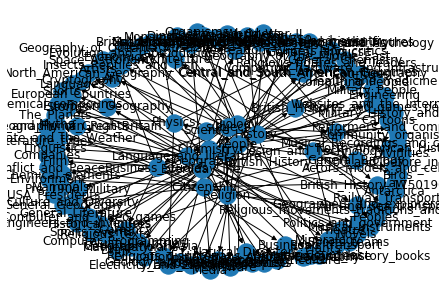

In [831]:
nx.draw(G, with_labels = True)

In [834]:
len(G.nodes())

142

In [833]:
df_categories = pd.DataFrame(categories_id)
df_categories.to_csv (r'category-ids.csv', header=False)